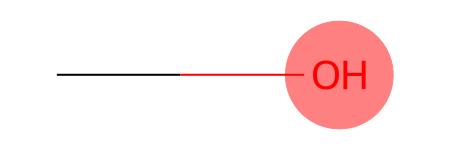

In [52]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem
import pubchempy as pcp
from pubchempy import get_compounds
from rdkit.Chem import Draw
import pandas as pd

def get_highlight(compound):
    results = pcp.get_compounds(compound, 'name')
    for compound in results:
        smiles= compound.isomeric_smiles
        mol=Chem.MolFromSmiles(smiles)
        subs2=Chem.MolFromSmarts('[OH]')
        mol.GetSubstructMatches(subs2)
        return mol


def generate_image(compound_list):
    mss=[]
    for index,value in enumerate(compound_list):
        mss.append(get_highlight(value))
    return Draw.MolsToGridImage(mss)
get_highlight('methanol')

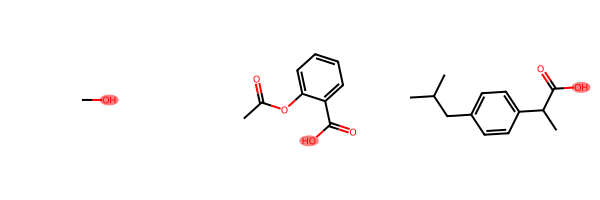

In [71]:
from rdkit import Chem
from rdkit.Chem import Draw
import pubchempy as pcp

def get_mol(compound):
    results = pcp.get_compounds(compound, 'name')
    for compound in results:
        smiles= compound.isomeric_smiles
        mol=Chem.MolFromSmiles(smiles)
        return mol
        
def generate_image(compound_list):
    if isinstance(compound_list, str):
        compound_list = [compound_list]
    mss = []
    for value in compound_list:
        mol = get_mol(value)
        if mol:
            mss.append(mol)
        core=Chem.MolFromSmarts('[OH]')
    return Draw.MolsToGridImage(mss,highlightAtomLists=[mol.GetSubstructMatch(core) for mol in mss])
generate_image(['methanol','aspirin','ibuprofen'])
